In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

In [5]:
all_btc = pd.read_csv('../Data/BTC-USD.csv')

In [6]:
all_btc.Date = pd.to_datetime(all_btc.Date, format='%Y-%m-%d')
all_btc = all_btc.set_index('Date')

In [7]:
all_btc

Open          High           Low         Close  \
Date                                                                 
2015-11-21    322.092010    328.158997    319.595001    326.927002   
2015-11-22    326.975006    327.010010    321.259003    324.536011   
2015-11-23    324.350006    325.118011    321.290009    323.045990   
2015-11-24    323.014008    323.058014    318.118011    320.045990   
2015-11-25    320.045013    329.134003    316.769989    328.205994   
...                  ...           ...           ...           ...   
2021-11-17  60139.621094  60823.609375  58515.410156  60368.011719   
2021-11-18  60360.136719  60948.500000  56550.792969  56942.136719   
2021-11-19  56896.128906  58351.113281  55705.179688  58119.578125   
2021-11-20  58115.082031  59859.878906  57469.726563  59697.195313   
2021-11-21  59689.230469  59897.675781  58641.667969  59558.062500   

               Adj Close        Volume  
Date                                    
2015-11-21    326.927002  2.820050e+07  
2015-11-22    324.536011  2.343940e+07  
2015-11-23    323.045990  2.747890e+07  
2015-11-24    320.045990  2.936260e+07  
2015-11-25    328.205994  4.166690e+07  
...                  ...           ...  
2021-11-17  60368.011719  3.917839e+10  
2021-11-18  56942.136719  4.138834e+10  
2021-11-19  58119.578125  3.870241e+10  
2021-11-20  59697.195313  3.062426e+10  
2021-11-21  59558.062500  2.550275e+10  

[2193 rows x 6 columns]

In [8]:
plt.plot(all_btc)

NameError: name 'plt' is not defined

In [9]:
#Creating a percent change column for the adjusted close data, as this will likely create
#more stationary data.

all_btc['Percent change'] = all_btc['Adj Close'].pct_change()

In [10]:
#Exploring null values in the adjusted close column in the dataset.

all_btc['Adj Close'].isnull().sum()

4

In [11]:
#Filling null values in the dataframe using their most previous values.

all_btc = all_btc.fillna(method='pad')
all_btc

Open          High           Low         Close  \
Date                                                                 
2015-11-21    322.092010    328.158997    319.595001    326.927002   
2015-11-22    326.975006    327.010010    321.259003    324.536011   
2015-11-23    324.350006    325.118011    321.290009    323.045990   
2015-11-24    323.014008    323.058014    318.118011    320.045990   
2015-11-25    320.045013    329.134003    316.769989    328.205994   
...                  ...           ...           ...           ...   
2021-11-17  60139.621094  60823.609375  58515.410156  60368.011719   
2021-11-18  60360.136719  60948.500000  56550.792969  56942.136719   
2021-11-19  56896.128906  58351.113281  55705.179688  58119.578125   
2021-11-20  58115.082031  59859.878906  57469.726563  59697.195313   
2021-11-21  59689.230469  59897.675781  58641.667969  59558.062500   

               Adj Close        Volume  Percent change  
Date                                                    
2015-11-21    326.927002  2.820050e+07             NaN  
2015-11-22    324.536011  2.343940e+07       -0.007314  
2015-11-23    323.045990  2.747890e+07       -0.004591  
2015-11-24    320.045990  2.936260e+07       -0.009287  
2015-11-25    328.205994  4.166690e+07        0.025496  
...                  ...           ...             ...  
2021-11-17  60368.011719  3.917839e+10        0.003437  
2021-11-18  56942.136719  4.138834e+10       -0.056750  
2021-11-19  58119.578125  3.870241e+10        0.020678  
2021-11-20  59697.195313  3.062426e+10        0.027144  
2021-11-21  59558.062500  2.550275e+10       -0.002331  

[2193 rows x 7 columns]

In [12]:
#importing and running adfuller test on the adjusted close and percent change columns.
#The null hypothesis: The data is non stationary
#The alternative: The data is stationary

caf_close = adfuller(all_btc['Adj Close'])
af_pct = adfuller(all_btc['Percent change'][1:2193])

ModuleNotFoundError: No module named 'statsmodels'

In [13]:
#adfuller test for the adjusted close column shows that it is very non-stationary because
#the p value (0.9837) is much larger than 0.05.

af_close

NameError: name 'af_close' is not defined

In [14]:
#adfuller test for the percent change column shows that it is very stationary because
#the p value (0.0) is much smaller than 0.05.

af_pct

NameError: name 'af_pct' is not defined

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
#fig = plt.figure(figsize=(12,8))
#ax1 = fig.add_subplot
#fig = plot_acf(df)

ModuleNotFoundError: No module named 'statsmodels'

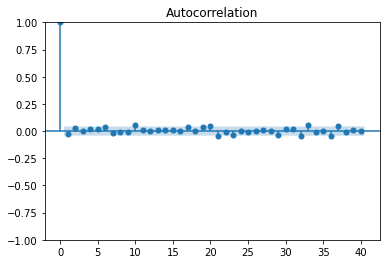

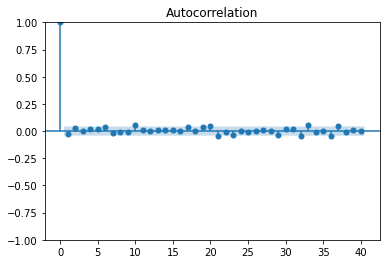

In [12]:
c

/Users/Teigen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


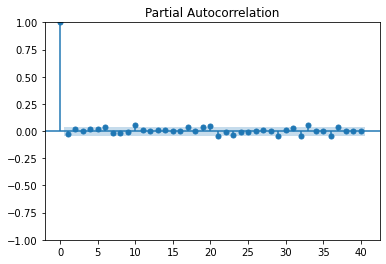

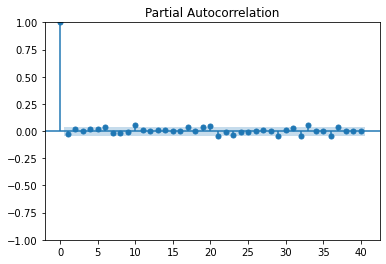

In [13]:
plot_pacf(all_btc['Percent change'].dropna(), lags=40)

In [16]:
from statsmodels.tsa.arima.model import ARIMA
first_model = ARIMA(all_btc['Percent change'], order=(1,1,1))
first_model_fit = first_model.fit()
first_model_fit.summary()

ModuleNotFoundError: No module named 'statsmodels'

In [15]:
predictions = first_model_fit.predict(start=2180, end=2200, dynamic=True)
predictions

2021-11-09    0.001412
2021-11-10    0.003294
2021-11-11    0.003240
2021-11-12    0.003242
2021-11-13    0.003242
2021-11-14    0.003242
2021-11-15    0.003242
2021-11-16    0.003242
2021-11-17    0.003242
2021-11-18    0.003242
2021-11-19    0.003242
2021-11-20    0.003242
2021-11-21    0.003242
2021-11-22    0.003242
2021-11-23    0.003242
2021-11-24    0.003242
2021-11-25    0.003242
2021-11-26    0.003242
2021-11-27    0.003242
2021-11-28    0.003242
2021-11-29    0.003242
Freq: D, Name: predicted_mean, dtype: float64

In [16]:
all_btc.tail(20)

Open          High           Low         Close  \
Date                                                                 
2021-11-02  60963.253906  64242.792969  60673.054688  63226.402344   
2021-11-03  63254.335938  63516.937500  61184.238281  62970.046875   
2021-11-04  62941.804688  63123.289063  60799.664063  61452.230469   
2021-11-05  61460.078125  62541.468750  60844.609375  61125.675781   
2021-11-06  61068.875000  61590.683594  60163.781250  61527.480469   
2021-11-07  61554.921875  63326.988281  61432.488281  63326.988281   
2021-11-08  63344.066406  67673.742188  63344.066406  67566.828125   
2021-11-09  67549.734375  68530.335938  66382.062500  66971.828125   
2021-11-10  66953.335938  68789.625000  63208.113281  64995.230469   
2021-11-11  64978.890625  65579.015625  64180.488281  64949.960938   
2021-11-12  64863.980469  65460.816406  62333.914063  64155.941406   
2021-11-13  64158.121094  64915.675781  63303.734375  64469.527344   
2021-11-14  64455.371094  65495.179688  63647.808594  65466.839844   
2021-11-15  65521.289063  66281.570313  63548.144531  63557.871094   
2021-11-16  63721.195313  63721.195313  59016.335938  60161.246094   
2021-11-17  60139.621094  60823.609375  58515.410156  60368.011719   
2021-11-18  60360.136719  60948.500000  56550.792969  56942.136719   
2021-11-19  56896.128906  58351.113281  55705.179688  58119.578125   
2021-11-20  58115.082031  59859.878906  57469.726563  59697.195313   
2021-11-21  59689.230469  59897.675781  58641.667969  59558.062500   

               Adj Close        Volume  Percent change  
Date                                                    
2021-11-02  63226.402344  3.774667e+10        0.036424  
2021-11-03  62970.046875  3.612473e+10       -0.004055  
2021-11-04  61452.230469  3.261585e+10       -0.024104  
2021-11-05  61125.675781  3.060510e+10       -0.005314  
2021-11-06  61527.480469  2.909493e+10        0.006573  
2021-11-07  63326.988281  2.472675e+10        0.029247  
2021-11-08  67566.828125  4.112561e+10        0.066952  
2021-11-09  66971.828125  4.235799e+10       -0.008806  
2021-11-10  64995.230469  4.873083e+10       -0.029514  
2021-11-11  64949.960938  3.588063e+10       -0.000697  
2021-11-12  64155.941406  3.608489e+10       -0.012225  
2021-11-13  64469.527344  3.047423e+10        0.004888  
2021-11-14  65466.839844  2.512209e+10        0.015470  
2021-11-15  63557.871094  3.055876e+10       -0.029159  
2021-11-16  60161.246094  4.684434e+10       -0.053441  
2021-11-17  60368.011719  3.917839e+10        0.003437  
2021-11-18  56942.136719  4.138834e+10       -0.056750  
2021-11-19  58119.578125  3.870241e+10        0.020678  
2021-11-20  59697.195313  3.062426e+10        0.027144  
2021-11-21  59558.062500  2.550275e+10       -0.002331

In [17]:
from pmdarima.arima.stationarity import ADFTest
adf_test = ADFTest(alpha=0.05)

In [26]:
p_val, should_diff = adf_test.should_diff(all_btc['Percent change'][1:2193].fillna(method='pad'))

print('P-val: ', p_val)
print('Difference data? ', should_diff)

P-val:  0.01
Difference data?  False


In [27]:
train, test, val = (all_btc['Percent change'][1:2100], all_btc['Percent change'][2100:2160],
                    all_btc['Percent change'][2160:2193])

In [30]:
!pip install pmdarima

In [32]:
import pmdarima as pm
from pmdarima import model_selection
#from pmdarima.utils import decompose
#from pmdarima.utils import decomposed_plot

arima = pm.auto_arima(train, error_action='ignore', trace=True, supress_warnings=True,
                     maxiter=100, seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-7556.486, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-7560.393, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-7559.679, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-7559.587, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-7558.609, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-7571.843, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-7571.901, Time=0.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-7571.814, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-7570.914, Time=0.30 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-7571.777, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-7569.899, Time=0.09 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.187 seconds


In [33]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2099
Model:               SARIMAX(1, 0, 0)   Log Likelihood                3788.950
Date:                Thu, 02 Dec 2021   AIC                          -7571.901
Time:                        19:36:06   BIC                          -7554.953
Sample:                             0   HQIC                         -7565.693
                               - 2099                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0033      0.001      3.788      0.000       0.002       0.005
ar.L1         -0.0313      0.015     -2.113      0.035      -0.060      -0.002
sigma2         0.0016   2.26e-05     70.038      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4965.14
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.26   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
arima.predict(X=train)

array([0.00153377, 0.00324331, 0.00318977, 0.00319145, 0.00319139,
       0.0031914 , 0.0031914 , 0.0031914 , 0.0031914 , 0.0031914 ])

In [36]:
predictions = list()
for i in range(len(test_scaled)):
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)
    yhat = invert_scale(scaler, X, yhat)
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    predictions.append(yhat)
    expected = raw_values[len(train) + i + 1]
    print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

NameError: name 'test_scaled' is not defined

In [37]:
arima = pm.auto_arima(train, error_action='ignore', trace=True, supress_warnings=True,
                     maxiter=100, seasonal=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-7571.843, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-7571.901, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-7571.777, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-7560.393, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-7571.814, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-7570.914, Time=0.29 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-7569.899, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-7559.679, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.275 seconds
